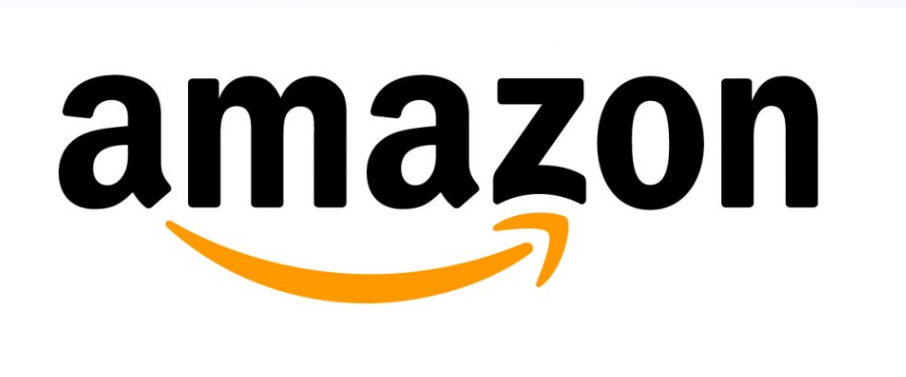

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [3]:
data = pd.read_json('reviews_Musical_Instruments_5.json.gz', lines=True)

In [45]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
reviewerID        10261 non-null object
asin              10261 non-null object
reviewerName      10234 non-null object
helpful           10261 non-null object
reviewText        10261 non-null object
overall           10261 non-null int64
summary           10261 non-null object
unixReviewTime    10261 non-null int64
reviewTime        10261 non-null object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [6]:
## train/test split
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["overall"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["overall"] = dataAfter["overall"].astype(int)

Before 10261
After 10261


In [7]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["overall"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [8]:
len(strat_train)

8208

In [9]:
strat_train["overall"].value_counts()/len(strat_train)

5    0.676170
4    0.203095
3    0.075171
2    0.024366
1    0.021199
Name: overall, dtype: float64

In [10]:
len(strat_test)

2053

In [11]:
strat_test["overall"].value_counts()/len(strat_test)

5    0.676084
4    0.203117
3    0.075499
2    0.024355
1    0.020945
Name: overall, dtype: float64

In [12]:
## Data Exploration
reviewTest = strat_train.copy()
reviewTest.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
715,A23HJIRA5PIMG0,B0002D02RQ,"Michael A. Rammel ""sixxstring""","[0, 2]",I bought the wrong gauge. I read a review that...,2,Good picks but...,1347926400,"09 18, 2012"
6664,A1VG6TG6LKBPKP,B001L8NGJ2,"Dr Jay ""ljison""","[0, 0]",This switch goes with the Fender Blues Jr. III...,4,This is the switch.,1380844800,"10 4, 2013"


In [13]:
## Set Target Variable (Sentiments)
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["overall"].apply(sentiments)
strat_test["Sentiment"] = strat_test["overall"].apply(sentiments)
strat_train["Sentiment"][:20]

715     Negative
6664    Positive
9699    Positive
8302    Positive
6382    Positive
6733    Positive
5907    Positive
5743    Positive
9268     Neutral
992     Positive
574     Positive
1654    Positive
7557    Positive
6238    Positive
5460    Positive
530     Positive
7164    Positive
4603     Neutral
3798    Positive
7250     Neutral
Name: Sentiment, dtype: object

In [14]:
## Data Preparation
X_train = strat_train["reviewText"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviewText"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

8208 2053


In [15]:
## Extract features
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(8208, 18463)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(8208, 18463)

In [17]:
## Building pipeline from extracted features
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [18]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.8792011690209449

In [19]:
## Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)


0.8816366293229421

In [33]:
from sklearn import metrics
print(metrics.confusion_matrix(X_test_targetSentiment, predictedLogReg))

[[   1    2   90]
 [   0    7  148]
 [   1    2 1802]]


In [34]:
print(metrics.classification_report(X_test_targetSentiment, predictedLogReg))

              precision    recall  f1-score   support

    Negative       0.50      0.01      0.02        93
     Neutral       0.64      0.05      0.08       155
    Positive       0.88      1.00      0.94      1805

    accuracy                           0.88      2053
   macro avg       0.67      0.35      0.35      2053
weighted avg       0.85      0.88      0.83      2053



In [20]:
## Support Vector Machine 
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.8835849975645397

In [31]:
from sklearn import metrics
print(metrics.confusion_matrix(X_test_targetSentiment, predictedLinearSVC))

[[  13   13   67]
 [   6   18  131]
 [   8   14 1783]]


In [32]:
print(metrics.classification_report(X_test_targetSentiment, predictedLinearSVC))

              precision    recall  f1-score   support

    Negative       0.48      0.14      0.22        93
     Neutral       0.40      0.12      0.18       155
    Positive       0.90      0.99      0.94      1805

    accuracy                           0.88      2053
   macro avg       0.59      0.41      0.45      2053
weighted avg       0.84      0.88      0.85      2053



In [21]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8202630297126157

In [35]:
from sklearn import metrics
print(metrics.confusion_matrix(X_test_targetSentiment, predictedDecisionTree))

[[  11   13   69]
 [  13   20  122]
 [  43  109 1653]]


In [36]:
print(metrics.classification_report(X_test_targetSentiment, predictedDecisionTree))

              precision    recall  f1-score   support

    Negative       0.16      0.12      0.14        93
     Neutral       0.14      0.13      0.13       155
    Positive       0.90      0.92      0.91      1805

    accuracy                           0.82      2053
   macro avg       0.40      0.39      0.39      2053
weighted avg       0.81      0.82      0.81      2053



In [22]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.8796882610813443

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(X_test_targetSentiment, predictedRandomForest))

[[   0    1   92]
 [   0    1  154]
 [   0    0 1805]]


In [39]:
print(metrics.classification_report(X_test_targetSentiment, predictedRandomForest))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        93
     Neutral       0.50      0.01      0.01       155
    Positive       0.88      1.00      0.94      1805

    accuracy                           0.88      2053
   macro avg       0.46      0.34      0.32      2053
weighted avg       0.81      0.88      0.82      2053

